In [77]:
import pandas as pd

api_data_df= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Netflix_project\repo\Netflix_content_analysis\combined_api_df.csv")
netflix_titles_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Netflix_project\repo\Netflix_content_analysis\netflix_titles.csv")
hours_watched_df= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Netflix_project\repo\Netflix_content_analysis\hours_watched.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns #-for dizualisation of data

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor #- for analysis and modelling


In [116]:
api_data_df.head(5)

,title,release_date,popularity,vote_average,genre_ids,genre_names,type
0,The Kelly Clarkson Show,09/09/2019,1478.168,6.280,[10767],Talk,tvshow
1,Grey's Anatomy,27/03/2005,1420.393,8.235,[18],Drama,tvshow
2,Sherri,12/09/2022,1326.580,4.200,[10767],Talk,tvshow
3,Bridgerton,25/12/2020,1301.462,8.100,[18],Drama,tvshow
4,Four in a Bed,22/11/2010,1148.900,6.875,[10764],Reality,tvshow


 Firstly, we aim to identify the top genres based on the number of movies and compare these findings with the Netflix data. This comparison will help us understand Netflix users' viewing preferences and assess how well Netflix caters to its audience.


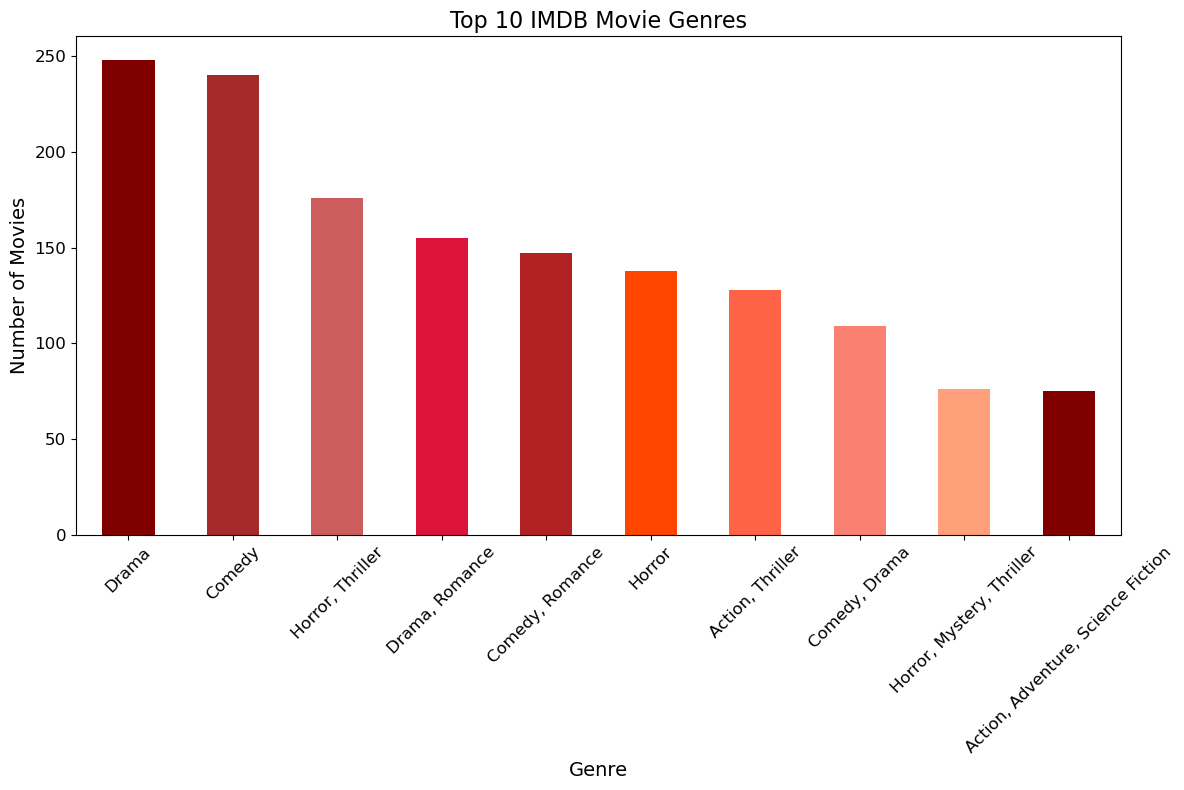

In [101]:

movie_data_df = api_data_df[api_data_df['type'] == 'movie']

colors = ['#FFA07A', '#FA8072', '#FF6347', '#FF4500', '#B22222', '#DC143C', '#CD5C5C', '#A52A2A', '#800000']
imdb_genre_counts =movie_data_df['genre_names'].value_counts()
top10_genres = imdb_genre_counts.head(10)
plt.figure(figsize=(12, 8))
top10_genres.plot(kind='bar', color=colors[::-1])
plt.xlabel('Genre', fontsize =14)
plt.ylabel('Number of Movies', fontsize = 14)
plt.title('Top 10 IMDB Movie Genres', fontsize = 16)
plt.xticks(rotation=45, fontsize = 12)  # Rotate the x-axis labels by 45 degrees
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

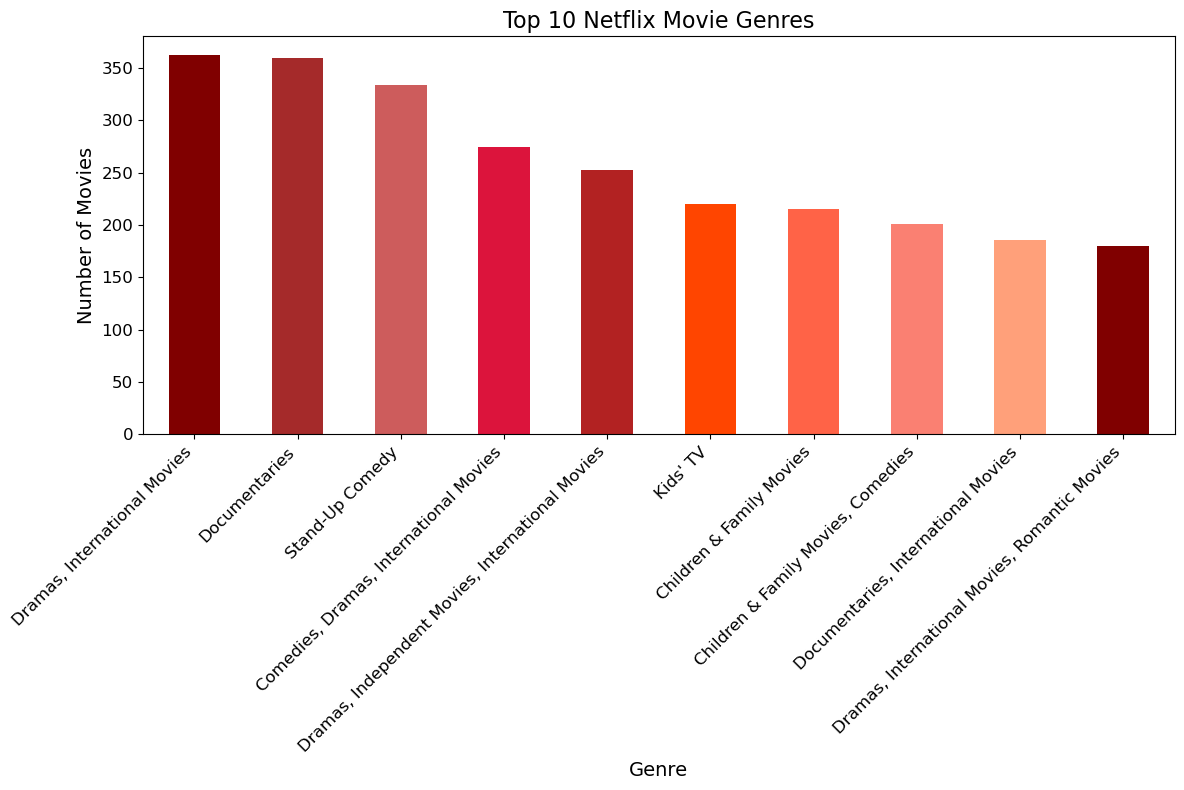

In [100]:

netflix_movie_data_df = netflix_titles_df[netflix_titles_df['type'] == 'Movie']

colors = ['#FFA07A', '#FA8072', '#FF6347', '#FF4500', '#B22222', '#DC143C', '#CD5C5C', '#A52A2A', '#800000']
netflix_genre_counts =netflix_titles_df['genre'].value_counts()
top10_genres = netflix_genre_counts.head(10)
plt.figure(figsize=(12, 8))
top10_genres.plot(kind='bar', color=colors[::-1])
plt.xlabel('Genre', fontsize =14)
plt.ylabel('Number of Movies', fontsize = 14)
plt.title('Top 10 Netflix Movie Genres', fontsize = 16)
plt.xticks(rotation=45, ha='right', fontsize = 12)  # Rotate the x-axis labels by 45 degrees
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

It seems like there's a difference between the top genres on IMDb and the top genres on Netflix. This could indicate variations in viewer preferences between the two platforms.

In [112]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [132]:
netflix_titles_df.head()


,show_id,type,title,director,cast,country,date,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [133]:
type_counts = netflix_titles_df['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


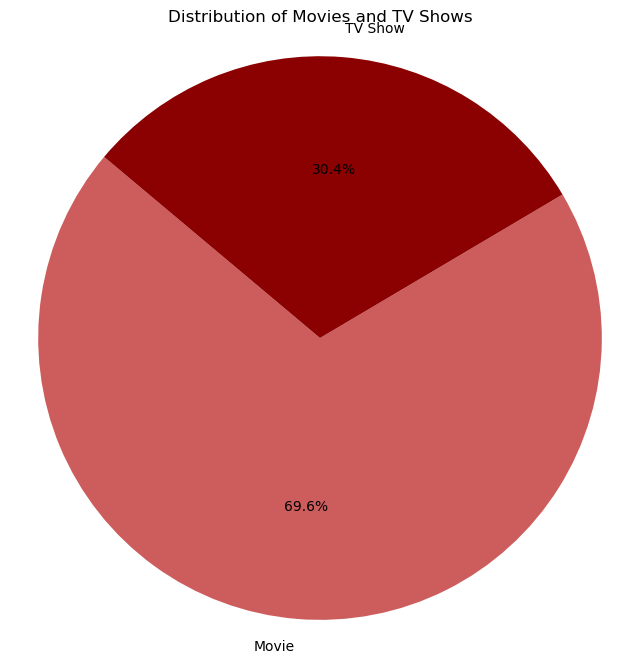

In [108]:
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#CD5C5C', '#8B0000'])
plt.title('Distribution of Movies and TV Shows')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

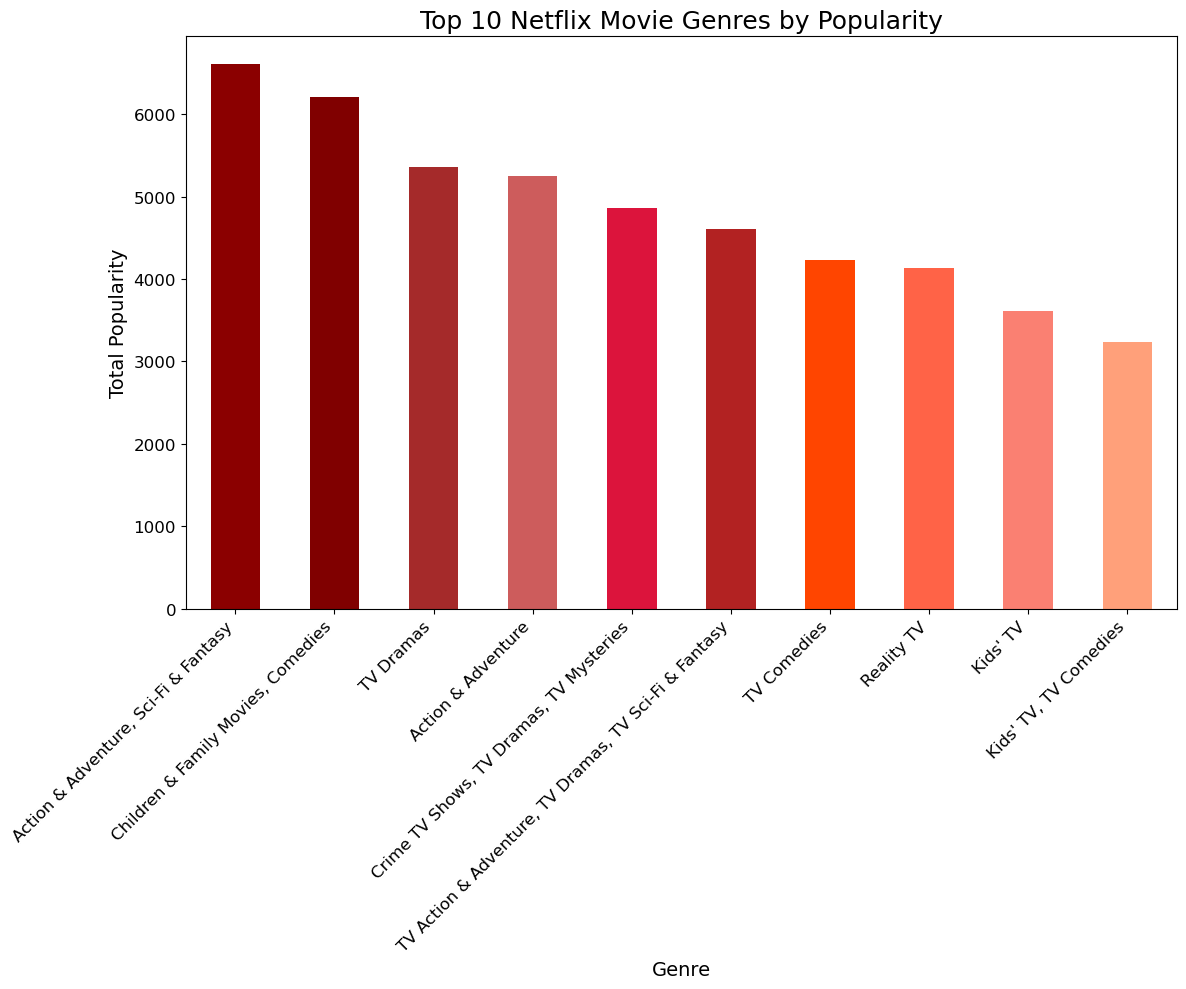

In [114]:
#seeing the top genre in netflix using the popularity score from imdb
genre_popularity = merged_df.groupby('genre')['popularity'].sum().nlargest(10)
colors = ['#FFA07A', '#FA8072', '#FF6347', '#FF4500', '#B22222', '#DC143C', '#CD5C5C', '#A52A2A', '#800000', '#8B0000']

plt.figure(figsize=(12, 10 ))
genre_popularity.plot(kind='bar', color=colors[::-1])
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Popularity', fontsize=14)
plt.title('Top 10 Netflix Genres by Popularity', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1000))
plt.tight_layout()
plt.show()

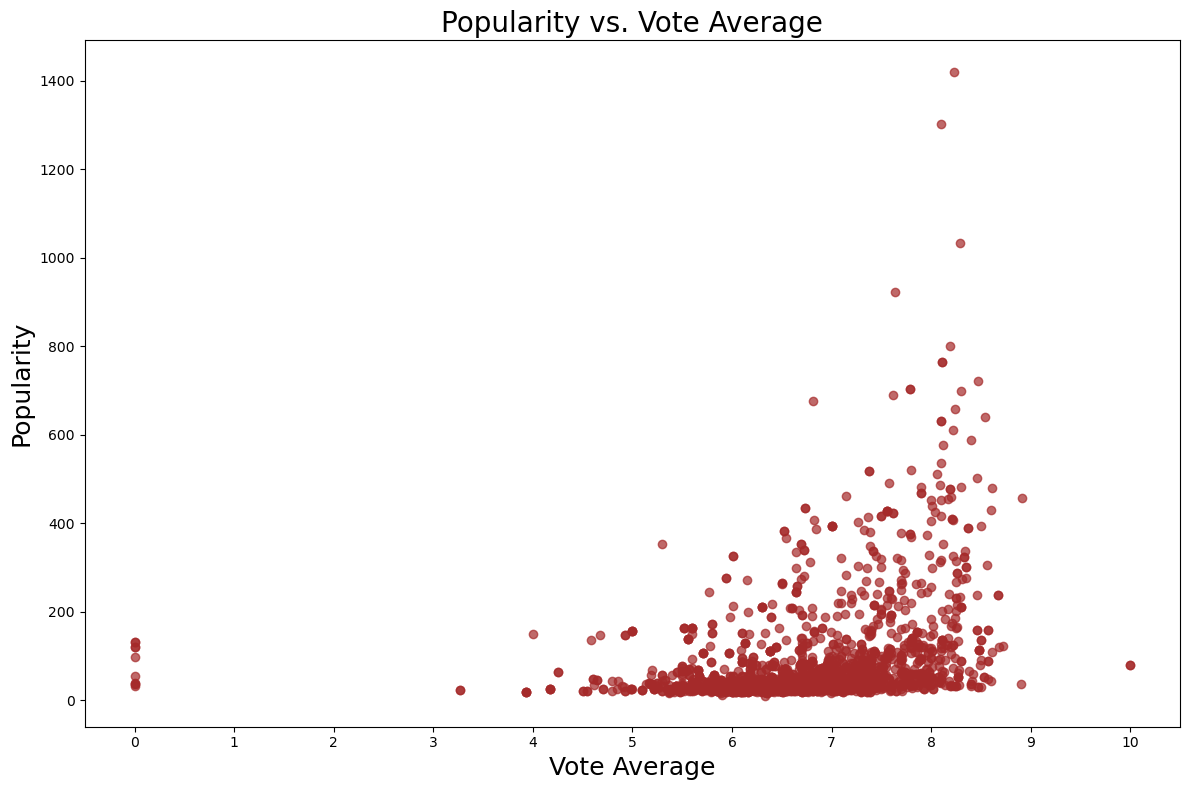

In [85]:
#correlating the average votes and popularity scores
import numpy as np

popularity = merged_df['popularity']
vote_average = merged_df['vote_average']

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(vote_average,popularity, color='#A52A2A', alpha=0.7)

# Adding labels and title
plt.xlabel('Vote Average',fontsize = 18)
plt.ylabel('Popularity', fontsize = 18)
plt.title('Popularity vs. Vote Average', fontsize= 20)
plt.xticks(np.arange(0, 11, 1))
# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()

The scatter plot illustrates that content with IMDb scores above 7 tends to enjoy higher popularity levels. This suggests a strong correlation between higher IMDb ratings and increased viewer engagement.

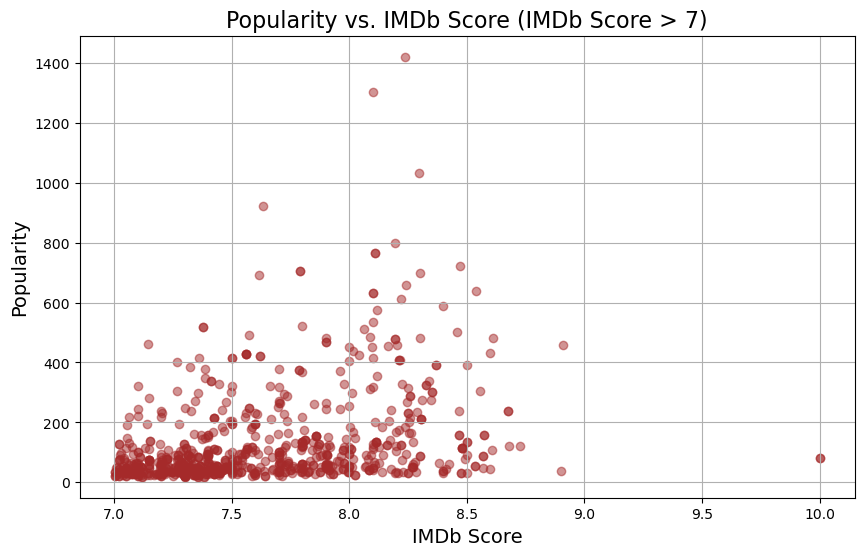

In [89]:


# Filter the data for IMDb scores greater than 7
high_imdb_df = merged_df[merged_df['vote_average'] > 7]

# Plot the scatter plot for popularity vs. IMDb scores
plt.figure(figsize=(10, 6))
plt.scatter(high_imdb_df['vote_average'], high_imdb_df['popularity'],color='#A52A2A', alpha=0.5)
plt.xlabel('IMDb Score', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity vs. IMDb Score (IMDb Score > 7)', fontsize=16)
plt.grid(True)
plt.show()


Upon closer examination, it's apparent that while content with IMDb scores above 7 tends to have higher popularity levels, the correlation isn't as strong as initially perceived. This indicates that factors other than IMDb ratings may also influence viewer engagement.

In [90]:
correlation = merged_df['vote_average'].corr(merged_df['popularity'])
print("Correlation coefficient between IMDb scores and popularity:", correlation)

Correlation coefficient between IMDb scores and popularity: 0.3222763188108466


The correlation coefficient between the IMDb scores and popularity levels is approximately 0.322. This indicates a positive correlation, meaning that as IMDb scores increase, popularity levels tend to increase as well. However, the correlation is relatively weak, suggesting that other factors may also influence popularity levels

In [117]:
country = netflix_titles_df['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(60)
country

,country,count
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [118]:
country = netflix_titles_df['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(10)
country


,country,count
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


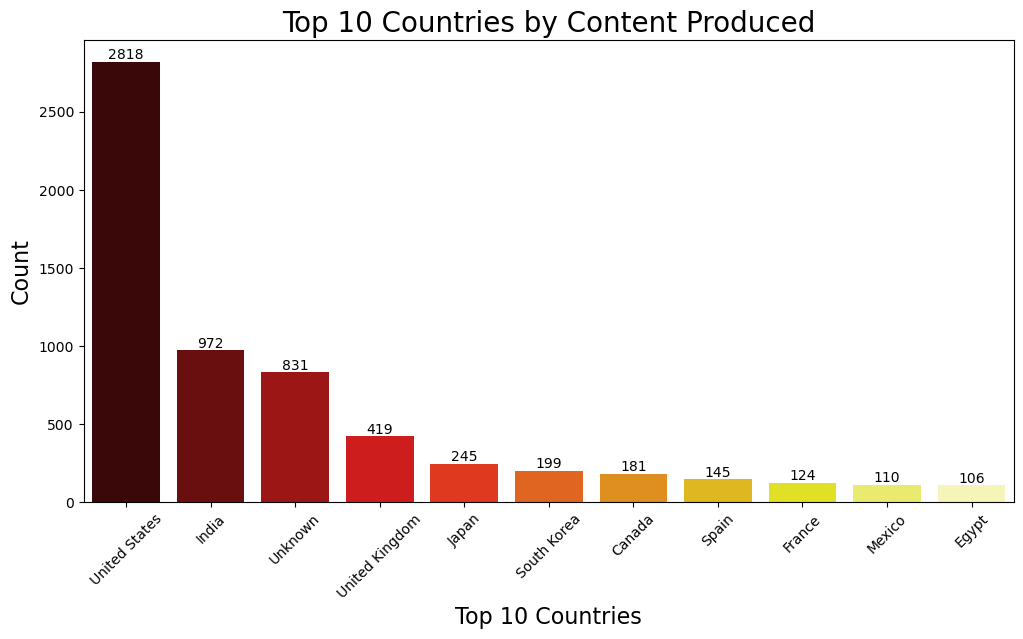

In [122]:
top_10_country = netflix_titles_df['country'].value_counts().head(11)
top_10_country.drop('Unknown')
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries by Content Produced', fontsize=20)
ax = sns.barplot(x=top_10_country.index, y=top_10_country, palette='hot')
plt.xlabel('Top 10 Countries', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

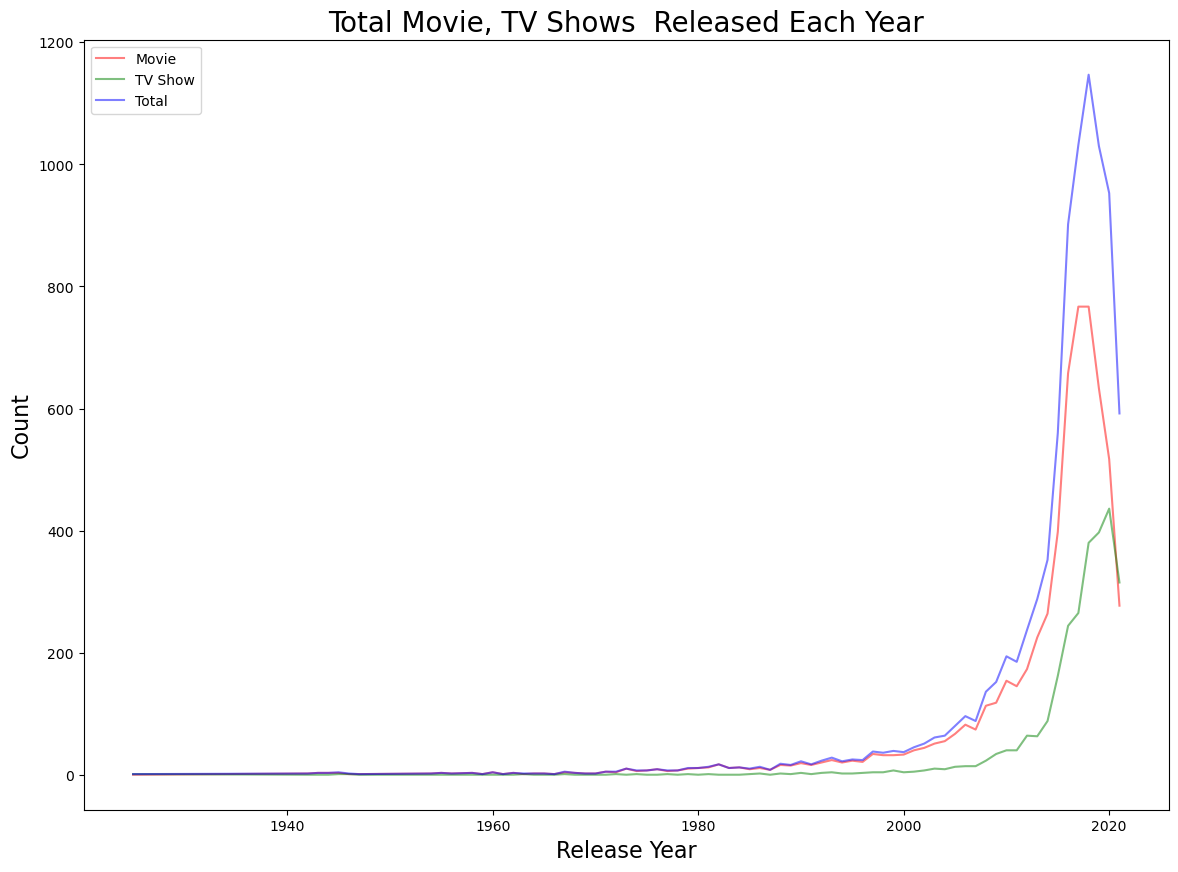

In [130]:
c_type = netflix_titles_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
c_type['Total'] = c_type['Movie'] + c_type['TV Show']
c_type = c_type.reset_index()

plt.figure(figsize=(14,10))
plt.title('Total Movie, TV Shows  Released Each Year', fontsize=20)
plt.plot(c_type['release_year'], c_type['Movie'], label='Movie', color='r', alpha=0.5)
plt.plot(c_type['release_year'], c_type['TV Show'], label='TV Show', color='g', alpha=0.5)
plt.plot(c_type['release_year'], c_type['Total'], label='Total', color='b', alpha=0.5)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper left')

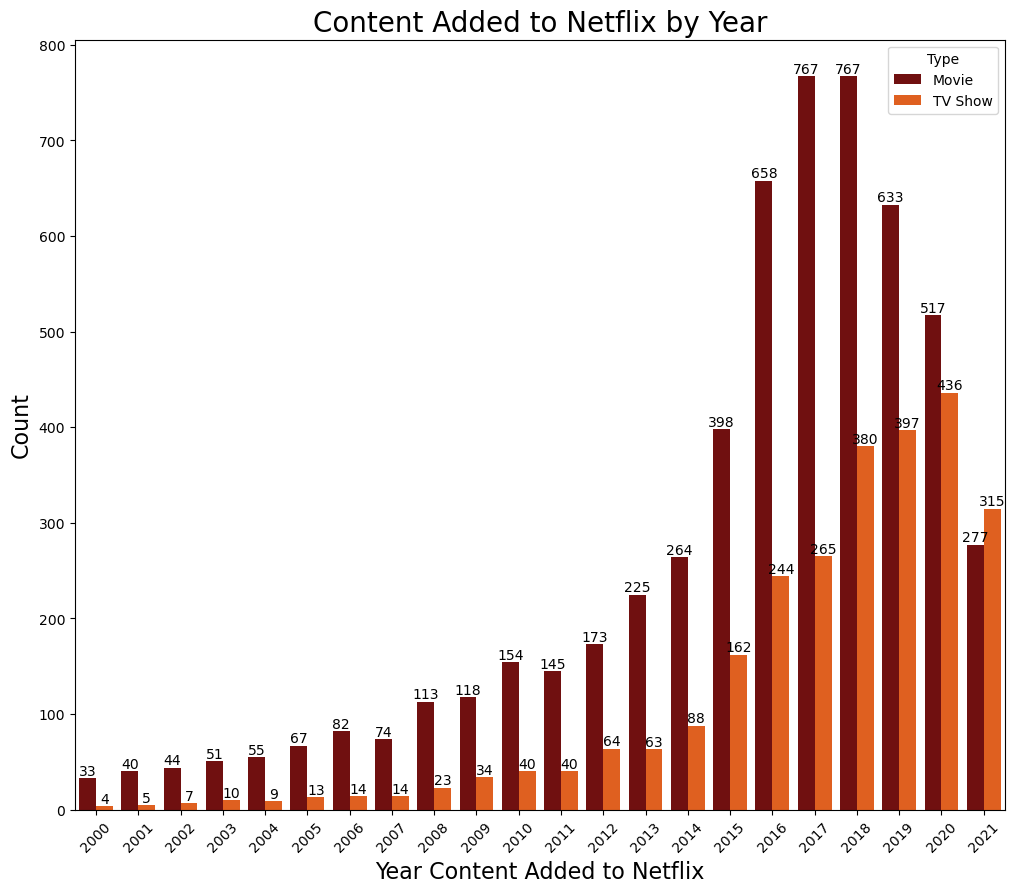

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to include only years from 2000 onwards, c = content
c_added = c_added[c_added['release_year'] >= 2000]

plt.figure(figsize=(12,10))
plt.title('Content Added to Netflix by Year', fontsize=20)
ax = sns.barplot(x=c_added['release_year'], y=c_added['Count'], hue=c_added['Type'], palette='gist_heat')
plt.xlabel('Year Content Added to Netflix', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)